In [1]:
#libraries 
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs,make_moons
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib.patches import Circle, ConnectionPatch
from scipy.spatial.distance import pdist, squareform
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score,calinski_harabasz_score, davies_bouldin_score


# Set random seed and style
np.random.seed(42)

## Step 1: Understanding Gaussian Distributions

A Gaussian distribution, also known as a normal distribution, is a bell-shaped curve characterized by its mean (μ) and standard deviation (σ). The formula for a Gaussian distribution is:

$$
f(x|\mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)
$$

Let's visualize a Gaussian distribution with mean 0 and standard deviation 2.

<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\s'
C:\Users\youssef.mecky\AppData\Local\Temp\ipykernel_5412\786390377.py:11: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(x, y, label=f'$\mu={mu}, \sigma={sigma}$')
C:\Users\youssef.mecky\AppData\Local\Temp\ipykernel_5412\786390377.py:11: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(x, y, label=f'$\mu={mu}, \sigma={sigma}$')


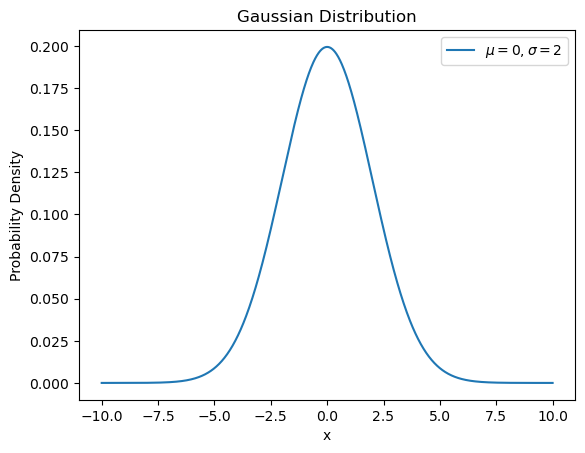

In [3]:
# Step 1: Understanding Gaussian Distributions
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.mixture import GaussianMixture

# Create a Jupyter Notebook cell
def plot_gaussian(mu, sigma):
    x = np.linspace(-10, 10, 1000)
    y = norm.pdf(x, mu, sigma)
    plt.plot(x, y, label=f'$\mu={mu}, \sigma={sigma}$')
    plt.title('Gaussian Distribution')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.show()

plot_gaussian(0, 2)

## Step 2: Mixture of Gaussians

A Gaussian Mixture Model (GMM) is a probabilistic model that assumes the data is generated from a mixture of several Gaussian distributions with unknown parameters. Each Gaussian distribution in the mixture is called a component.

<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\s'
C:\Users\youssef.mecky\AppData\Local\Temp\ipykernel_5412\4049603228.py:6: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(x, y1, label=f'Component 1: $\mu={mu1}, \sigma={sigma1}$')
C:\Users\youssef.mecky\AppData\Local\Temp\ipykernel_5412\4049603228.py:6: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(x, y1, label=f'Component 1: $\mu={mu1}, \sigma={sigma1}$')
C:\Users\youssef.mecky\AppData\Local\Temp\ipykernel_5412\4049603228.py:7: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(x, y2, label=f'Component 2: $\mu={mu2}, \sigma={sigma2}$')
C:\Users\youssef.mecky\AppData\Local

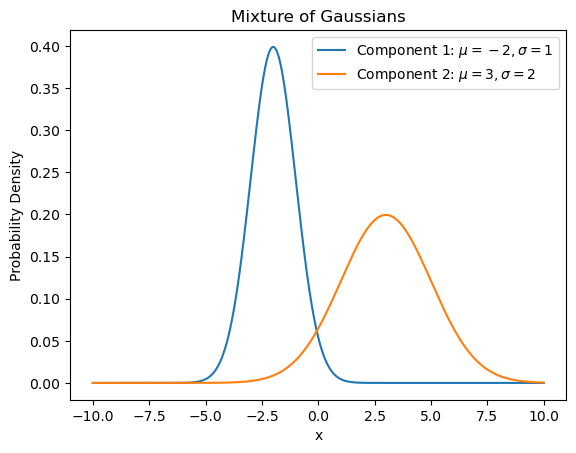

In [5]:
# Step 2: Mixture of Gaussians
def plot_mixture_of_gaussians(mu1, sigma1, mu2, sigma2):
    x = np.linspace(-10, 10, 1000)
    y1 = norm.pdf(x, mu1, sigma1)
    y2 = norm.pdf(x, mu2, sigma2)
    plt.plot(x, y1, label=f'Component 1: $\mu={mu1}, \sigma={sigma1}$')
    plt.plot(x, y2, label=f'Component 2: $\mu={mu2}, \sigma={sigma2}$')
    plt.title('Mixture of Gaussians')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.show()

plot_mixture_of_gaussians(-2, 1, 3, 2)

## Step 3: Generating Data from a GMM

Let's generate some sample data from a mixture of two Gaussian distributions.

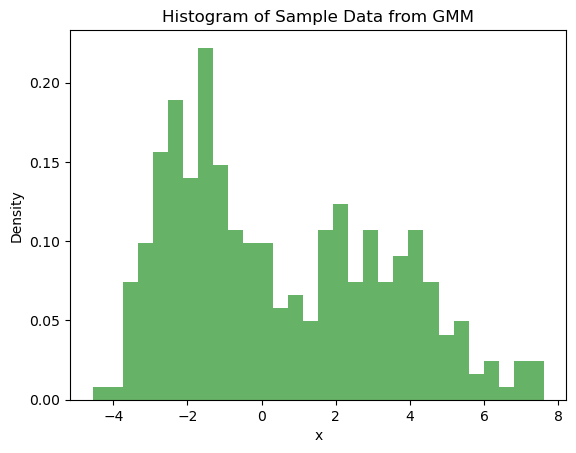

In [7]:
def generate_data_from_gmm(mu1, sigma1, mu2, sigma2, n_samples=300):
    np.random.seed(0)
    data1 = np.random.normal(mu1, sigma1, n_samples // 2)
    data2 = np.random.normal(mu2, sigma2, n_samples // 2)
    data = np.hstack([data1, data2])
    plt.hist(data, bins=30, density=True, alpha=0.6, color='g')
    plt.title('Histogram of Sample Data from GMM')
    plt.xlabel('x')
    plt.ylabel('Density')
    plt.show()
    return data

data = generate_data_from_gmm(-2, 1, 3, 2)

## Step 4: Fitting a GMM to the Data
To fit a GMM to the data, we use the `GaussianMixture` class from the `sklearn.mixture` module. The fitting process involves:

1. **Initialization:** The algorithm starts with an initial guess of the parameters (means, variances, and weights) of the Gaussian components.
2. **Expectation Step (E-step):** For each data point, the algorithm calculates the probability that it belongs to each of the Gaussian components based on the current parameters.
3. **Maximization Step (M-step):** The algorithm updates the parameters of the Gaussian components to maximize the likelihood of the data given these probabilities.
4. **Iteration:** Steps 2 and 3 are repeated until convergence, i.e., the parameters do not change significantly between iterations.

C:\Users\youssef.mecky\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


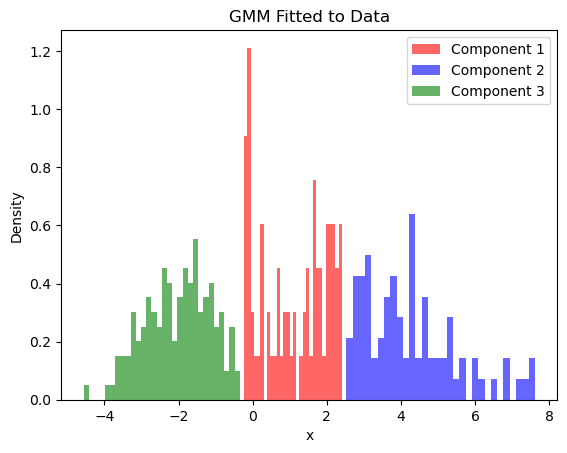

In [9]:


def fit_gmm_to_data(data, n_components=3):
    gmm = GaussianMixture(n_components=n_components, random_state=0).fit(data.reshape(-1, 1))
    labels = gmm.predict(data.reshape(-1, 1))
    plt.hist(data[labels == 0], bins=30, density=True, alpha=0.6, color='r', label='Component 1')
    plt.hist(data[labels == 1], bins=30, density=True, alpha=0.6, color='b', label='Component 2')
    plt.hist(data[labels == 2], bins=30, density=True, alpha=0.6, color='g', label='Component 3')
    plt.title('GMM Fitted to Data')
    plt.xlabel('x')
    plt.ylabel('Density')
    plt.legend()
    plt.show()
    return gmm, labels

gmm, labels = fit_gmm_to_data(data)

## Step 5: Visualizing the GMM Components

Let's visualize the Gaussian components fitted by the GMM along with the data.

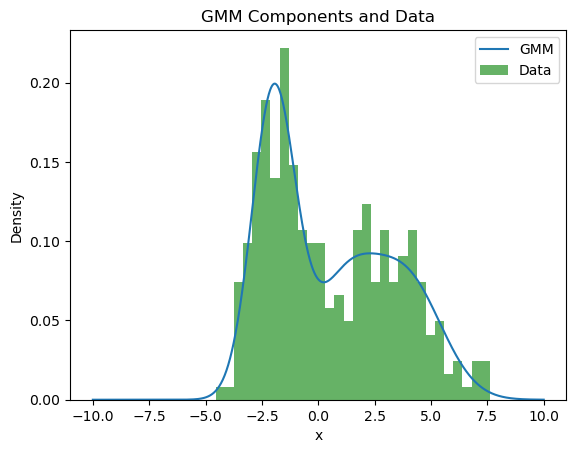

In [11]:

# Step 5: Visualizing the GMM Components
def visualize_gmm_components(data, gmm):
    x = np.linspace(-10, 10, 1000)
    weights = gmm.weights_
    means = gmm.means_.flatten()
    covariances = gmm.covariances_.flatten()
    y = np.zeros_like(x)

    for i in range(len(weights)):
        y += weights[i] * norm.pdf(x, means[i], np.sqrt(covariances[i]))

    plt.plot(x, y, label='GMM')
    plt.hist(data, bins=30, density=True, alpha=0.6, color='g', label='Data')
    plt.title('GMM Components and Data')
    plt.xlabel('x')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

visualize_gmm_components(data, gmm)

# Clustering Metrics: A Comprehensive Guide

Clustering is a fundamental task in machine learning, where the goal is to group similar data points together. But how do we know if our clustering results are good? This is where clustering metrics come in! They help us evaluate the quality of the clusters produced by our algorithms. Let's dive into some of the most commonly used clustering metrics, explained in a friendly and easy-to-understand way.

## 1. Silhouette Coefficient

**What it measures:** The Silhouette Coefficient measures how similar a data point is to its own cluster compared to other clusters.

**Interpretation:**
- **High value (closer to 1):** The data point is well-matched to its own cluster and poorly matched to neighboring clusters.
- **Low value (closer to -1):** The data point might be assigned to the wrong cluster.
- **Value near 0:** The clusters are overlapping.

**Formula:**

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

Where:
- \( s(i) \) is the silhouette coefficient for the \(i\)-th data point.
- \( a(i) \) is the average distance from the \(i\)-th data point to all other points in the same cluster.
- \( b(i) \) is the average distance from the \(i\)-th data point to all points in the nearest cluster.

## 2. Within-Cluster Sum of Squares (WCSS)

**What it measures:** The Within-Cluster Sum of Squares (WCSS) measures the total variance within each cluster. It is the sum of the squared differences between each data point and the centroid of its cluster.

**Interpretation:**
- **Lower value:** Indicates more compact clusters.
- It penalizes clusters that have a large spread.

**Formula:**

$$
\text{WCSS} = \sum_{k=1}^{K} \sum_{i \in C_k} \left\| x_i - \mu_k \right\|^2
$$

Where:
- \( \text{WCSS} \) is the Within-Cluster Sum of Squares.
- \( K \) is the number of clusters.
- \( C_k \) is the \(k\)-th cluster.
- \( x_i \) is a data point in cluster \( C_k \).
- \( \mu_k \) is the centroid of cluster \( C_k \).

## 3. Davies-Bouldin Index

**What it measures:** The Davies-Bouldin Index measures the average similarity between each cluster and its most similar cluster.

**Interpretation:**
- **Lower value:** Indicates better-defined clusters.
- It penalizes clusters that are close together or have large variances.

**Formula:**

$$
\text{DB} = \frac{1}{k} \sum_{i=1}^{k} \max_{j \neq i} \left( \frac{s_i + s_j}{d(c_i, c_j)} \right)
$$

Where:
- \( \text{DB} \) is the Davies-Bouldin Index.
- \( k \) is the number of clusters.
- \( s_i \) is the average distance between each point in cluster \(i\) and the centroid of cluster \(i\).
- \( d(c_i, c_j) \) is the distance between the centroids of clusters \(i\) and \(j\).




By understanding these metrics and their interpretations, you can effectively evaluate the quality of your clustering results and make informed decisions about thexamples, you can visit [GeeksforGeeks].

# When to Use Each Clustering Metric

Evaluating the quality of clustering results is crucial in machine learning. Different metrics provide insights into various aspects of the clustering quality. Below is a guide on when to use each clustering metric.

## 1. Silhouette Coefficient

**When to Use:**
- **Assessing Compactness and Separation:** Use the Silhouette Coefficient when you want to evaluate how well-separated and compact your clusters are.
- **Comparing Different Clustering Algorithms:** It is useful for comparing the performance of different clustering algorithms or different parameter settings for the same algorithm.


## 2. Within-Cluster Sum of Squares (WCSS)

**When to Use:**
- **Evaluating Compactness:** Use WCSS when you want to measure the compactness of your clusters. It helps in understanding how closely the data points in a cluster are grouped around the centroid.
- **Elbow Method for Optimal Clusters:** It is commonly used in the Elbow Method to determine the optimal number of clusters by plotting the WCSS against the number of clusters and looking for an "elbow point."



## 3. Davies-Bouldin Index

**When to Use:**
- **Identifying Overlapping Clusters:** Use the Davies-Bouldin Index to identify if your clusters are overlapping or not well-separated.
- **Comparing Cluster Quality:** It is useful for comparing the quality of clustering results across different algorithms or parameter settings.
- **Penalizing Large Variances:** It penalizes clusters with large variances, making it suitable for datasets where you want to avoid spread-out clusters.



## Summary

The choice of metric depends on the specific characteristics of your data and the clustering algorithm used. Often, using a combination of metrics provides a more comprehensive evaluation:

- **Silhouette Coefficient:** Best for assessing the compactness and separation of clusters.
- **Within-Cluster Sum of Squares (WCSS):** Ideal for evaluating the compactness of clusters and determining the optimal number of clusters.
- **Davies-Bouldin Index:** Useful for identifying overlapping clusters and ensuring clusters are distinct with small variances.

By understanding the strengths and appropriate use cases for each metric, you can effectively evaluate the quality of your clustering results and make informed decisions about the best clustering algorithm and parameter settings for your specific task.

C:\Users\youssef.mecky\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


K-Means Metrics:
Silhouette Score: 0.6819938690643478
WCSS: 212.0059962108348
Davies-Bouldin Index: 0.43756400782378396

DBSCAN Metrics:
Silhouette Score: -0.025530977724335973
WCSS: 59.7339776002824
Davies-Bouldin Index: 2.3465689840609243


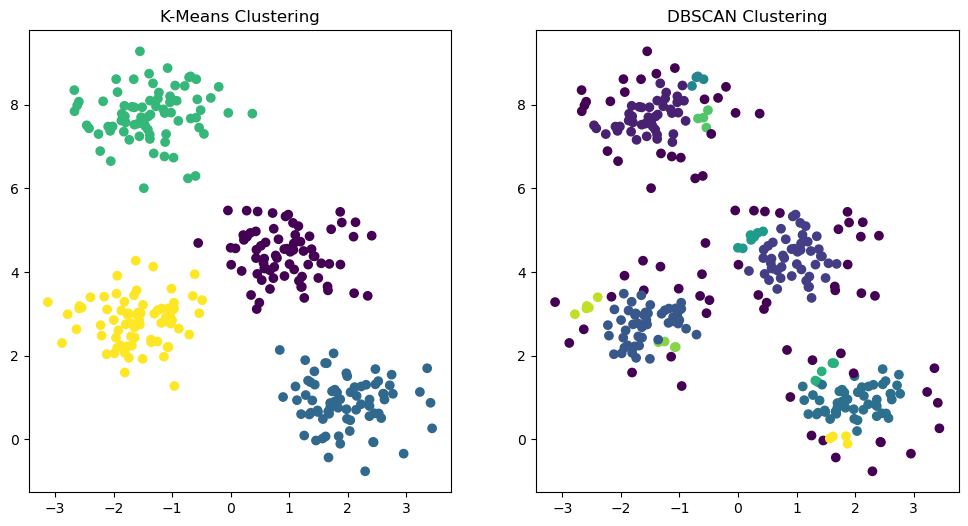

In [14]:
# Generate sample data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
labels_kmeans = kmeans.labels_

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.3, min_samples=5).fit(X)
labels_dbscan = dbscan.labels_

# Calculate WCSS for K-Means
wcss_kmeans = sum([((X[labels_kmeans == i] - kmeans.cluster_centers_[i])**2).sum() for i in range(4)])

# Calculate WCSS for DBSCAN
def calculate_wcss(X, labels):
    unique_labels = np.unique(labels)
    wcss = 0
    for label in unique_labels:
        if label != -1:  # Ignore noise points
            cluster_points = X[labels == label]
            centroid = cluster_points.mean(axis=0)
            wcss += ((cluster_points - centroid)**2).sum()
    return wcss

wcss_dbscan = calculate_wcss(X, labels_dbscan)

# Calculate metrics
silhouette_kmeans = silhouette_score(X, labels_kmeans)
davies_bouldin_kmeans = davies_bouldin_score(X, labels_kmeans)

silhouette_dbscan = silhouette_score(X, labels_dbscan)
davies_bouldin_dbscan = davies_bouldin_score(X, labels_dbscan)

print("K-Means Metrics:")
print("Silhouette Score:", silhouette_kmeans)
print("WCSS:", wcss_kmeans)
print("Davies-Bouldin Index:", davies_bouldin_kmeans)

print("\nDBSCAN Metrics:")
print("Silhouette Score:", silhouette_dbscan)
print("WCSS:", wcss_dbscan)
print("Davies-Bouldin Index:", davies_bouldin_dbscan)

# Visualize the clusters
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=labels_kmeans, cmap='viridis')
plt.title('K-Means Clustering')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=labels_dbscan, cmap='viridis')
plt.title('DBSCAN Clustering')

plt.show()

# Comparison of Clustering Algorithms

## 1. K-Means Clustering

### Advantages:
- **Simplicity:** Easy to understand and implement.
- **Efficiency:** Computationally efficient, especially for large datasets.
- **Scalability:** Scales well with the number of samples and features.
- **Speed:** Fast convergence.

### Disadvantages:
- **Fixed Number of Clusters:** Requires the number of clusters (K) to be specified in advance.
- **Sensitivity to Initialization:** Results can vary based on the initial choice of centroids.
- **Assumes Spherical Clusters:** Assumes clusters are spherical and of similar size.
- **Not Robust to Noise:** Sensitive to outliers and noisy data.

### When to Use:
- When you have a large dataset.
- When you have a rough idea of the number of clusters.
- When clusters are expected to be evenly sized.

## 2. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

### Advantages:
- **No Need for Number of Clusters:** Does not require specifying the number of clusters in advance.
- **Robust to Noise:** Can handle outliers effectively.
- **Arbitrary Shape Clusters:** Can find clusters of arbitrary shape.

### Disadvantages:
- **Parameter Sensitivity:** Sensitive to the choice of parameters (epsilon and min_samples).
- **Scalability:** Not as efficient for very large datasets.
- **Difficulty with Varying Densities:** Struggles with clusters of varying densities.

### When to Use:
- When your data contains noise and outliers.
- When you do not know the number of clusters in advance.

## 3. Gaussian Mixture Models (GMM)

### Advantages:
- **Soft Clustering:** Provides probabilistic cluster memberships, allowing for soft clustering.
- **Flexibility:** Can model clusters with different shapes and sizes.
- **Handles Overlapping Clusters:** Can handle overlapping clusters effectively.

### Disadvantages:
- **Fixed Number of Clusters:** Requires specifying the number of clusters in advance.
- **Computational Complexity:** More computationally intensive than K-Means.
- **Parameter Sensitivity:** Sensitive to the initial parameters and may converge to local optima.

### When to Use:
- When you need soft clustering (probabilistic memberships).
- When clusters may overlap.

## 4. Hierarchical Clustering

### Advantages:
- **Dendrogram:** Produces a dendrogram, which provides a visual representation of the clustering process.
- **No Need for Number of Clusters:** Does not require specifying the number of clusters in advance.
- **Any Shape Clusters:** Can find clusters of arbitrary shape.

### Disadvantages:
- **Scalability:** Computationally expensive, especially for large datasets.
- **Not Robust to Noise:** Sensitive to outliers and noisy data.
- **Parameter Sensitivity:** Results can vary based on the choice of linkage criteria (e.g., single, complete, average).

### When to Use:
- When you need a visual representation of the clustering process.
- When you have a small to medium-sized dataset.
- When you do not know the number of clusters in advance.